### Import the attached CSV files (Diamond.csv) and answer the following questions:

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

df = pd.read_csv('diamond.csv')
df.head()

,carat,cut,color,clarity,depth,table,weight,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335


### Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [2]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
categorical_df = df.select_dtypes(include=['object'])

In [3]:
numerical_df.head()

,carat,depth,table,weight,size,price
0,0.23,61.5,55.0,3.95,3.98,326
1,0.21,59.8,61.0,3.89,3.84,326
2,0.23,56.9,65.0,4.05,4.07,327
3,0.29,62.4,58.0,4.20,4.23,334
4,0.31,63.3,58.0,4.34,4.35,335


In [4]:
categorical_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


### Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.

In [5]:
# Pandas stats
pandas_mean = numerical_df.mean()
pandas_median = numerical_df.median()
pandas_mode = numerical_df.mode().iloc[0]  # mode returns a dataframe, so we select the first row

# Statistics library stats
stats_mean = numerical_df.apply(stats.mean)
stats_median = numerical_df.apply(stats.median)
stats_mode = numerical_df.apply(lambda x: stats.mode(x))

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    'Pandas Mean': pandas_mean,
    'Stats Mean': stats_mean,
    'Pandas Median': pandas_median,
    'Stats Median': stats_median,
    'Pandas Mode': pandas_mode,
    'Stats Mode': stats_mode
})
comparison_df

,Pandas Mean,Stats Mean,Pandas Median,Stats Median,Pandas Mode,Stats Mode
carat,0.797940,0.797940,0.70,0.70,0.30,0.30
depth,61.749405,61.749405,61.80,61.80,62.00,62.00
table,57.457184,57.457184,57.00,57.00,56.00,56.00
weight,5.731157,5.731157,5.70,5.70,4.37,4.37
size,5.734526,5.734526,5.71,5.71,4.34,4.34
price,3932.799722,3932.799722,2401.00,2401.00,605.00,605.00


### Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed

In [6]:
# Checking the skewness of all numerical variables
skewness = numerical_df.skew()

# Categorizing the skewness
skewness_category = skewness.apply(lambda x: 'Highly Skewed' if abs(x) > 1 else ('Moderately Skewed' if abs(x) > 0.5 else 'Lightly Skewed'))

# Combining the results into a DataFrame
skewness_df = pd.DataFrame({'Skewness': skewness,'Category': skewness_category})
skewness_df

,Skewness,Category
carat,1.116646,Highly Skewed
depth,-0.082294,Lightly Skewed
table,0.796896,Moderately Skewed
weight,0.378676,Lightly Skewed
size,2.434167,Highly Skewed
price,1.618395,Highly Skewed


In [7]:
# Checking the skewness of all numerical variables
skewness = numerical_df.skew()
def categorize_skewness(x):
    if abs(x) > 1:
        return 'Highly Skewed'
    elif abs(x) > 0.5:
        return 'Moderately Skewed'
    else:
        return 'Lightly Skewed'

skewness_category = skewness.apply(categorize_skewness)
# Combining the results into a DataFrame
skewness_df = pd.DataFrame({'Skewness': skewness,'Category': skewness_category})

skewness_df

,Skewness,Category
carat,1.116646,Highly Skewed
depth,-0.082294,Lightly Skewed
table,0.796896,Moderately Skewed
weight,0.378676,Lightly Skewed
size,2.434167,Highly Skewed
price,1.618395,Highly Skewed


### Use the different transformation techniques to convert skewed data found in previous question into normal distribution

#### Log Transformation

In [8]:
# Deep copy
numerical_log_transfrom_df = numerical_df.copy()

In [9]:
columns_to_log = ['carat', 'depth', 'table', 'weight', 'size', 'price']
numerical_log_transfrom_df[columns_to_log] = np.log(numerical_log_transfrom_df[columns_to_log]+1)

In [10]:
numerical_log_transfrom_df.head()

,carat,depth,table,weight,size,price
0,0.207014,4.135167,4.025352,1.599388,1.605430,5.789960
1,0.190620,4.107590,4.127134,1.587192,1.576915,5.789960
2,0.207014,4.058717,4.189655,1.619388,1.623341,5.793014
3,0.254642,4.149464,4.077537,1.648659,1.654411,5.814131
4,0.270027,4.163560,4.077537,1.675226,1.677097,5.817111


In [11]:
def categorize_skewness(x):
    if abs(x) > 1:
        return 'Highly Skewed'
    elif abs(x) > 0.5:
        return 'Moderately Skewed'
    else:
        return 'Lightly Skewed'

In [12]:
# Checking the skewness of all numerical variables after log transformation
skewness = numerical_log_transfrom_df.skew()
skewness_category = skewness.apply(categorize_skewness)
# Combining the results into a DataFrame
skewness_df = pd.DataFrame({'Skewness': skewness,'Category': skewness_category})
skewness_df

,Skewness,Category
carat,0.580654,Moderately Skewed
depth,-0.359117,Lightly Skewed
table,0.602231,Moderately Skewed
weight,-0.073063,Lightly Skewed
size,0.006600,Lightly Skewed
price,0.115926,Lightly Skewed


###### By using Log transformation we get very less skewness in "size" column 

### Sqrt Tranformation

In [13]:
# Deep copy
numerical_sqrt_transfrom_df = numerical_df.copy()

In [14]:
columns_to_sqrt = ['carat', 'depth', 'table', 'weight', 'size', 'price']
numerical_sqrt_transfrom_df[columns_to_sqrt] = np.sqrt(numerical_sqrt_transfrom_df[columns_to_sqrt])

In [15]:
numerical_sqrt_transfrom_df.head()

,carat,depth,table,weight,size,price
0,0.479583,7.842194,7.416198,1.987461,1.994994,18.055470
1,0.458258,7.733046,7.810250,1.972308,1.959592,18.055470
2,0.479583,7.543209,8.062258,2.012461,2.017424,18.083141
3,0.538516,7.899367,7.615773,2.049390,2.056696,18.275667
4,0.556776,7.956130,7.615773,2.083267,2.085665,18.303005


In [16]:
# Checking the skewness of all numerical variables after Sqrt transformation
skewness = numerical_sqrt_transfrom_df.skew()
skewness_category = skewness.apply(categorize_skewness)
# Combining the results into a DataFrame
skewness_df = pd.DataFrame({'Skewness': skewness,'Category': skewness_category})
skewness_df

,Skewness,Category
carat,0.548471,Moderately Skewed
depth,-0.219913,Lightly Skewed
table,0.692227,Moderately Skewed
weight,0.088258,Lightly Skewed
size,0.363648,Lightly Skewed
price,0.844396,Moderately Skewed


###### By using sqrt transformation we get very less skewness in "weight" column

### Cube Root Tranformation

In [17]:
# Deep copy
numerical_cuberoot_transfrom_df = numerical_df.copy()

In [18]:
columns_to_cuberoot = ['carat', 'depth', 'table', 'weight', 'size', 'price']
numerical_cuberoot_transfrom_df[columns_to_cuberoot] = numerical_cuberoot_transfrom_df[columns_to_cuberoot].apply(np.cbrt)

In [19]:
numerical_cuberoot_transfrom_df.head()

,carat,depth,table,weight,size,price
0,0.612693,3.947223,3.802952,1.580759,1.584751,6.882389
1,0.594392,3.910513,3.936497,1.572714,1.565947,6.882389
2,0.612693,3.846249,4.020726,1.593988,1.596607,6.889419
3,0.661911,3.966385,3.870877,1.613429,1.617261,6.938232
4,0.676790,3.985363,3.870877,1.631160,1.632412,6.945150


In [20]:
# Checking the skewness of all numerical variables after Sqrt transformation
skewness = numerical_cuberoot_transfrom_df.skew()
skewness_category = skewness.apply(categorize_skewness)
# Combining the results into a DataFrame
skewness_df = pd.DataFrame({'Skewness': skewness,'Category': skewness_category})
skewness_df

,Skewness,Category
carat,0.386589,Lightly Skewed
depth,-0.267034,Lightly Skewed
table,0.660170,Moderately Skewed
weight,-0.322953,Lightly Skewed
size,-0.132075,Lightly Skewed
price,0.591189,Moderately Skewed


### BoxCox Tranformation

In [21]:
# Deep copy
numerical_boxcox_transfrom_df = numerical_df.copy()

In [22]:
# Define a function to apply Box-Cox to each column
def boxcox_transform(column):
    # Adding 1 in case there are any zeros, as Box-Cox requires positive values
    transformed_data, _ = boxcox(column + 1)
    return transformed_data

In [23]:
# Apply the Box-Cox transformation to multiple columns
numerical_boxcox_transfrom_df = numerical_boxcox_transfrom_df.apply(boxcox_transform, axis=0)

In [24]:
numerical_boxcox_transfrom_df.head()

,carat,depth,table,weight,size,price
0,0.182396,416.357392,0.236713,1.736710,1.595582,4.793885
1,0.169610,398.713992,0.236713,1.722371,1.567412,4.793885
2,0.182396,369.259594,0.236713,1.760264,1.613272,4.795951
3,0.218091,425.809380,0.236713,1.794822,1.643954,4.810232
4,0.229174,435.337850,0.236713,1.826278,1.666351,4.812246


In [25]:
# Checking the skewness of all numerical variables after Sqrt transformation
skewness = numerical_boxcox_transfrom_df.skew()
skewness_category = skewness.apply(categorize_skewness)
# Combining the results into a DataFrame
skewness_df = pd.DataFrame({'Skewness': skewness,'Category': skewness_category})
skewness_df

,Skewness,Category
carat,0.117887,Lightly Skewed
depth,0.068120,Lightly Skewed
table,0.000000,Lightly Skewed
weight,0.004618,Lightly Skewed
size,-0.000807,Lightly Skewed
price,0.025726,Lightly Skewed


###### By using Boxcox transformation we get very less skewness in all the columns

### Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers

In [26]:
def detect_outliers_iqr(df):
    outliers_dict = []
    
    # Loop through all columns in the DataFrame
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Determine outlier step
        outlier_step = 1.5 * IQR
        print("BoxPlot details for {}".format(column))
        print("Lower limit is  : {}".format(Q1 - outlier_step)) # zeroth Percentile or minimum value
        print("1st quartile is : {}".format(np.percentile(df[column], 25))) # 1st quartile
        print("Median is       : {}".format(np.percentile(df[column], 50))) # 2nd quartile or median
        print("3rd quartile is : {}".format(np.percentile(df[column], 75))) # 3rd quartile
        print("Upper limit is  : {}".format(Q3 + outlier_step)) # 100th Percentile or maximum value
        # Get outliers' indices and values
        outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)]
        
        if not outliers.empty:
            # Store the column, index, and value in the list
            for idx, value in outliers[column].items():
                outliers_dict.append({'Column': column, 'Index': idx, 'Outlier Value': value})
    
    # Convert the list of outliers to a DataFrame
    outliers_df = pd.DataFrame(outliers_dict)
    
    return outliers_df

##### Passing the column one by one

In [27]:
outliers = detect_outliers_iqr(numerical_df[['carat']])
outliers.shape

BoxPlot details for carat
Lower limit is  : -0.5599999999999999
1st quartile is : 0.4
Median is       : 0.7
3rd quartile is : 1.04
Upper limit is  : 2.0


(1889, 3)

In [28]:
outliers = detect_outliers_iqr(numerical_df[['depth']])
outliers.shape

BoxPlot details for depth
Lower limit is  : 58.75
1st quartile is : 61.0
Median is       : 61.8
3rd quartile is : 62.5
Upper limit is  : 64.75


(2545, 3)

In [29]:
outliers = detect_outliers_iqr(numerical_df[['table']])
outliers.shape

BoxPlot details for table
Lower limit is  : 51.5
1st quartile is : 56.0
Median is       : 57.0
3rd quartile is : 59.0
Upper limit is  : 63.5


(605, 3)

In [30]:
outliers = detect_outliers_iqr(numerical_df[['size']])
outliers.shape

BoxPlot details for size
Lower limit is  : 1.9899999999999993
1st quartile is : 4.72
Median is       : 5.71
3rd quartile is : 6.54
Upper limit is  : 9.27


(29, 3)

In [31]:
outliers = detect_outliers_iqr(numerical_df[['price']])
outliers.shape

BoxPlot details for price
Lower limit is  : -5611.375
1st quartile is : 950.0
Median is       : 2401.0
3rd quartile is : 5324.25
Upper limit is  : 11885.625


(3540, 3)

##### Passing the numerical dataframe

In [32]:
outliers = detect_outliers_iqr(numerical_df)
outliers.shape

BoxPlot details for carat
Lower limit is  : -0.5599999999999999
1st quartile is : 0.4
Median is       : 0.7
3rd quartile is : 1.04
Upper limit is  : 2.0
BoxPlot details for depth
Lower limit is  : 58.75
1st quartile is : 61.0
Median is       : 61.8
3rd quartile is : 62.5
Upper limit is  : 64.75
BoxPlot details for table
Lower limit is  : 51.5
1st quartile is : 56.0
Median is       : 57.0
3rd quartile is : 59.0
Upper limit is  : 63.5
BoxPlot details for weight
Lower limit is  : 1.9649999999999999
1st quartile is : 4.71
Median is       : 5.7
3rd quartile is : 6.54
Upper limit is  : 9.285
BoxPlot details for size
Lower limit is  : 1.9899999999999993
1st quartile is : 4.72
Median is       : 5.71
3rd quartile is : 6.54
Upper limit is  : 9.27
BoxPlot details for price
Lower limit is  : -5611.375
1st quartile is : 950.0
Median is       : 2401.0
3rd quartile is : 5324.25
Upper limit is  : 11885.625


(8640, 3)

#### Passing the column one by one after applying boxcox transformation

In [33]:
outliers = detect_outliers_iqr(numerical_boxcox_transfrom_df[['carat']])
outliers.shape

BoxPlot details for carat
Lower limit is  : -0.021103445269345822
1st quartile is : 0.27466773966657376
Median is       : 0.3878644724968774
3rd quartile is : 0.4718485296238535
Upper limit is  : 0.7676197145597731


(0, 0)

In [34]:
outliers = detect_outliers_iqr(numerical_boxcox_transfrom_df[['depth']])
outliers.shape

BoxPlot details for depth
Lower limit is  : 387.55227630512036
1st quartile is : 411.1395090635429
Median is       : 419.49952792959675
3rd quartile is : 426.86433090249125
Upper limit is  : 450.45156366091373


(2545, 3)

In [37]:
outliers = detect_outliers_iqr(numerical_boxcox_transfrom_df[['table']])
outliers.shape

BoxPlot details for table
Lower limit is  : 0.2367127642880396
1st quartile is : 0.23671276693168505
Median is       : 0.2367127675725141
3rd quartile is : 0.23671276869411534
Upper limit is  : 0.23671277133776075


(254, 3)

In [38]:
outliers = detect_outliers_iqr(numerical_boxcox_transfrom_df[['size']])
outliers.shape

BoxPlot details for size
Lower limit is  : 1.3239129723382392
1st quartile is : 1.732351587061773
Median is       : 1.8897633276740597
3rd quartile is : 2.004643996877462
Upper limit is  : 2.413082611600996


(10, 3)

In [39]:
outliers = detect_outliers_iqr(numerical_boxcox_transfrom_df[['price']])
outliers.shape

BoxPlot details for price
Lower limit is  : 3.954370586419233
1st quartile is : 5.491118606943071
Median is       : 6.056896626175227
3rd quartile is : 6.515617287292296
Upper limit is  : 8.052365307816135


(0, 0)

###### Except for the 'depth' column, outliers in the other columns were significantly reduced after applying the Box-Cox transformation

### Convert categorical variables into numerical variables using LabelEncoder technique

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
categorical_df.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [42]:
columns_to_check = categorical_df.columns
unique_values = {column: categorical_df[column].unique() for column in columns_to_check }
unique_values

{'cut': array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object),
 'color': array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object),
 'clarity': array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object)}

In [43]:
# Deep copy
categorical_label_encode_transfrom_df = categorical_df.copy()

In [44]:
columns_to_encode = categorical_df.columns
for column in columns_to_encode:
    categorical_label_encode_transfrom_df[column] = le.fit_transform(categorical_label_encode_transfrom_df[column])

In [45]:
categorical_label_encode_transfrom_df.head()

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3


### Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables.

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initializing Scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Applying StandardScaler
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(numerical_df),columns=numerical_df.columns)

# Applying MinMaxScaler
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(numerical_df),columns=numerical_df.columns)

In [47]:
df_standard_scaled.head()

,carat,depth,table,weight,size,price
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-0.904095
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-0.904095
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-0.903844
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-0.902090
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-0.901839


In [48]:
df_minmax_scaled.head()

,carat,depth,table,weight,size,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.000000
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.000000
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.000054
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.000433
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.000487


In [49]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)
# Apply StandardScaler
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_encoded), columns=df_encoded.columns)
df_standard_scaled.head()

,carat,depth,table,weight,size,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-0.904095,-0.316312,1.225928,-0.586085,-0.537255,...,-0.42657,-0.334294,-0.234343,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-0.904095,-0.316312,-0.815708,1.706238,-0.537255,...,-0.42657,-0.334294,-0.234343,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-0.903844,3.161440,-0.815708,-0.586085,-0.537255,...,-0.42657,-0.334294,-0.234343,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-0.902090,-0.316312,-0.815708,1.706238,-0.537255,...,-0.42657,2.991381,-0.234343,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-0.901839,3.161440,-0.815708,-0.586085,-0.537255,...,-0.42657,-0.334294,4.267248,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


In [50]:
# Apply StandardScaler
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_encoded), columns=df_encoded.columns)
df_minmax_scaled.head()

,carat,depth,table,weight,size,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.000054,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.000433,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.000487,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Create the Histogram for all numeric variables and draw the KDE plot on that

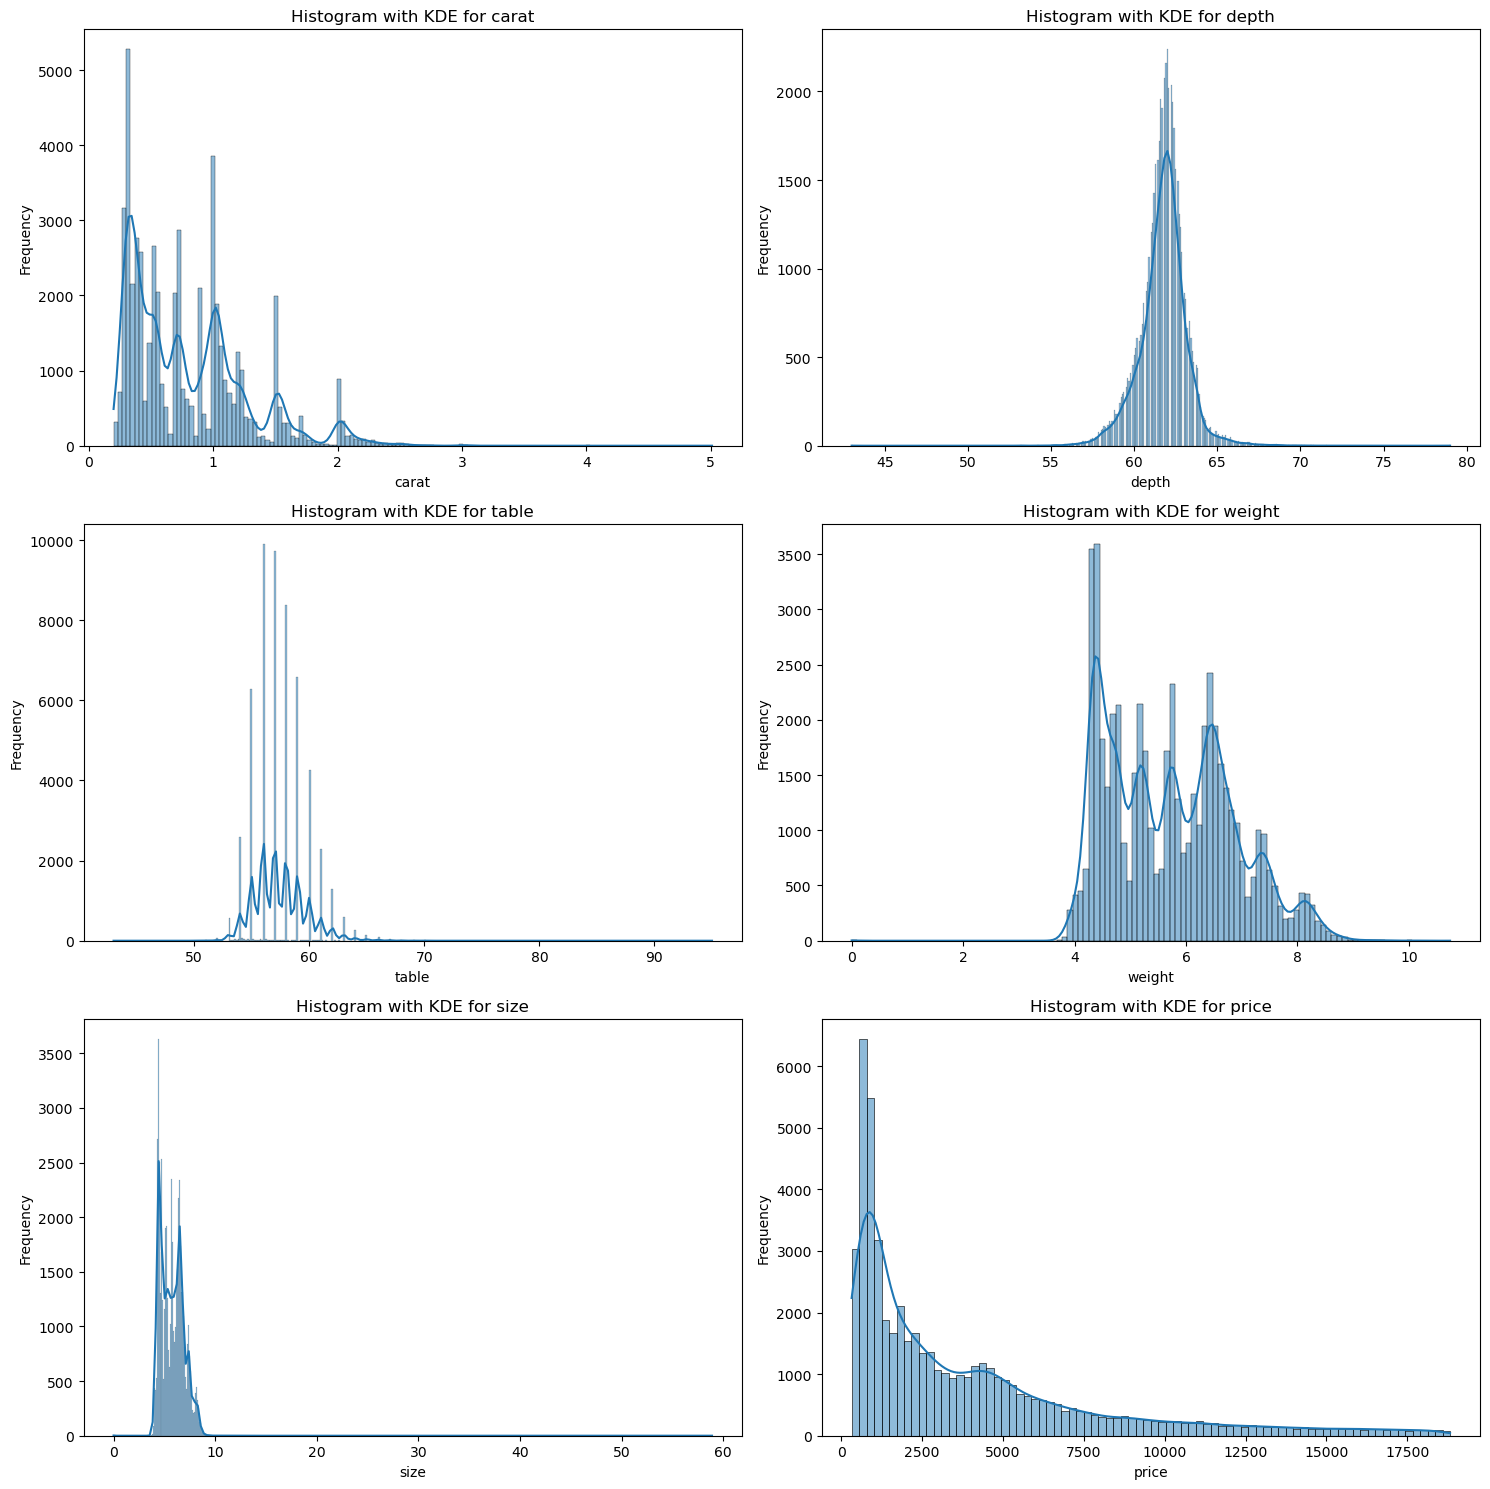

In [51]:
# Define the number of rows and columns for the subplots
n_cols = 2  # Number of columns (you can adjust this)
n_rows = (len(numerical_df.columns) + n_cols - 1) // n_cols  # Number of rows

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array if necessary (in case of a single row or column)
axes = axes.flatten()

# Plot each histogram with KDE on the respective subplot
for i, column in enumerate(numerical_df.columns):
    sns.histplot(numerical_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with KDE for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if there are more subplots than columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


##### Checking Histogram for all numeric variables and draw the KDE plot on that after box-cox tranformation

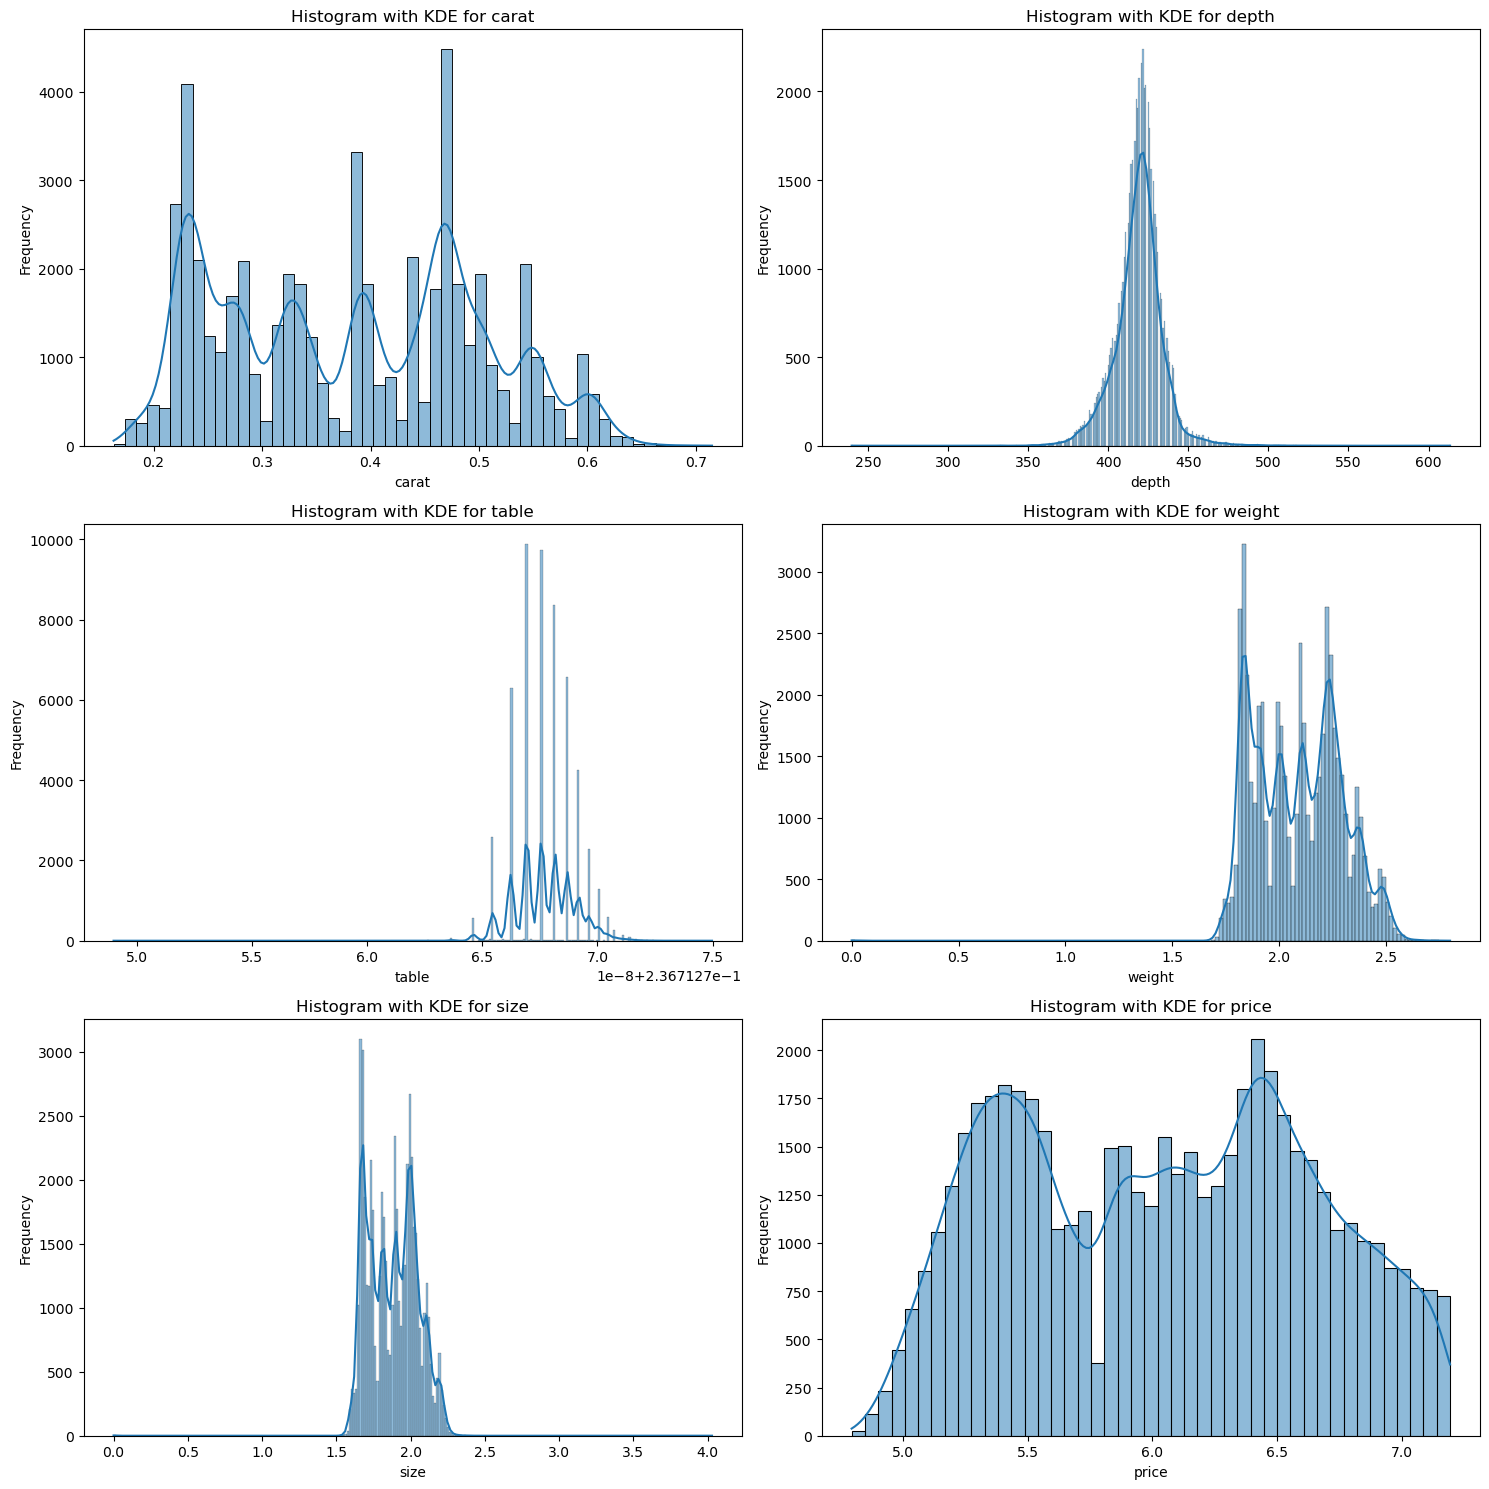

In [52]:
# Define the number of rows and columns for the subplots
n_cols = 2  # Number of columns (you can adjust this)
n_rows = (len(numerical_boxcox_transfrom_df.columns) + n_cols - 1) // n_cols  # Number of rows

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array if necessary (in case of a single row or column)
axes = axes.flatten()

# Plot each histogram with KDE on the respective subplot
for i, column in enumerate(numerical_boxcox_transfrom_df.columns):
    sns.histplot(numerical_boxcox_transfrom_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with KDE for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if there are more subplots than columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


### Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data.

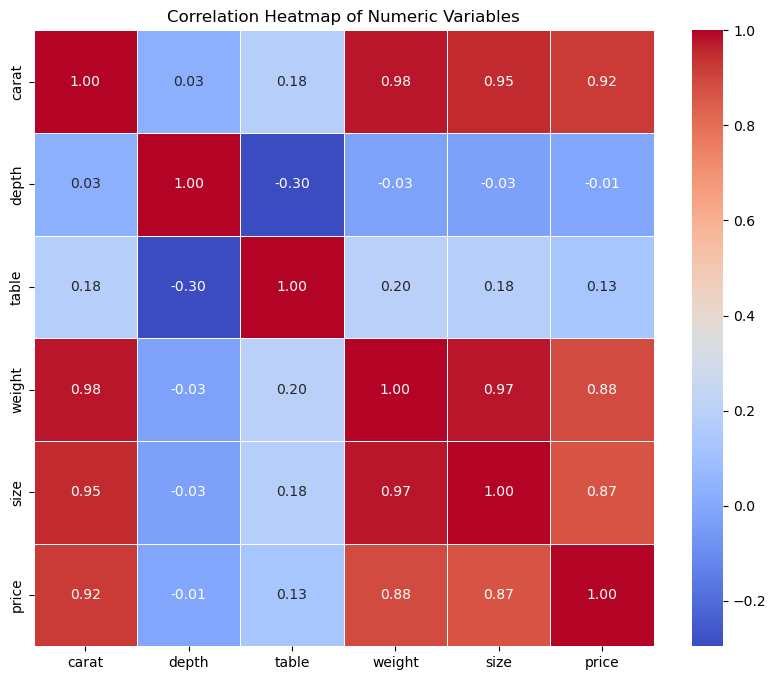

In [53]:
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

### Strong Positive Correlations:
1. **Carat and Weight (0.975)**:
   - As the carat of the diamond increases, the weight also increases significantly. This is expected since carat is a measure of a diamond's weight.

2. **Carat and Size (0.952)**:
   - There is a strong positive correlation between carat and size, indicating that larger carat diamonds tend to have larger surface areas.

3. **Carat and Price (0.922)**:
   - Carat is highly correlated with price, meaning that as the carat size increases, the price of the diamond also tends to increase.

4. **Weight and Size (0.975)**:
   - Weight and size are strongly correlated, suggesting that heavier diamonds generally have larger surface areas.

5. **Weight and Price (0.884)**:
   - Weight is strongly correlated with price, indicating that heavier diamonds tend to be more expensive.

6. **Size and Price (0.865)**:
   - Size is also strongly correlated with price, meaning that larger diamonds are typically more expensive.
   
### Conclusion:
- **Carat** is the most influential factor affecting the price of a diamond, strongly correlated with both **weight** and **size**.
- **Weight** and **Size** are closely related, and both are also significant predictors of **price**.
ctors of price
 **table** size play a less significant role.ar **table** size play a less significant role.

### Explain Gradient descent in detail. How changing the values of learning rate can impact the convergence in Gradient Descent

Imagine you're in a hilly area, blindfolded, and your goal is to reach the lowest point (valley). Gradient descent is like a strategy to find this lowest point:

1. You start at a random spot on the hill.
2. You feel the ground around you to figure out which way is steeper downhill.
3. You take a step in that downhill direction.
4. You repeat steps 2 and 3 until you can't go any lower.

Now, the learning rate is like the size of your steps:

1. Big steps (high learning rate):
   - You move faster but might overshoot the valley.
   - You might end up jumping back and forth across the valley.
   - In extreme cases, you could even start climbing up the other side!

2. Tiny steps (low learning rate):
   - You move very slowly and carefully.
   - It takes a long time to reach the bottom.
   - You might get stuck in a small dip that isn't the real lowest point.

3. Just right steps (optimal learning rate):
   - You move at a good pace without overshooting.
   - You reach the bottom efficiently.

Example:
Imagine you're on a U-shaped hill, starting at the edge:

- With big steps, you might jump from one side to the other, back and forth.
- With tiny steps, you'd slowly inch your way down one side.
- With just-right steps, you'd smoothly make your way to the bottom.

In machine learning, instead of a physical hill, we're dealing with a "hill" of errors in our predictions. The goal is to find the point where our predictions have the least error. The learning rate helps us adjust how quickly we try to improve our predictions as we "walk down" this error hill.

Gradient descent is a fundamental optimization algorithm used in machine learning and deep learning to minimize a cost function. It's particularly important for training models with large numbers of parameters. Let's break down the concept and then explore how the learning rate impacts convergence.

Gradient Descent Explained:

1. Objective: The goal is to find the minimum of a cost function J(θ), where θ represents the parameters of the model.

2. Process:
   
   - Start with initial parameter values.
   - Calculate the gradient (partial derivatives) of the cost function with respect to each parameter.
   - Update the parameters in the opposite direction of the gradient.
   - Repeat steps 2nd and 3rd step until convergence or a stopping criterion is met.

4. Update Rule:
   θ_new = θ_old - α * ∇J(θ)
   Where:
   - α is the learning rate
   - ∇J(θ) is the gradient of the cost function

5. Types of Gradient Descent:
   - Batch Gradient Descent: Uses entire dataset for each update.
   - Stochastic Gradient Descent (SGD): Uses one sample at a time.
   - Mini-batch Gradient Descent: Uses a small batch of samples.

Impact of Learning Rate:

The learning rate α is crucial in determining how quickly and accurately the algorithm converges to the minimum. Let's explore its impact:

1. Too High Learning Rate:
   - Large steps in parameter space.
   - May overshoot the minimum.
   - Can lead to divergence or oscillation around the minimum.

2. Too Low Learning Rate:
   - Small steps in parameter space.
   - Slow convergence.
   - May get stuck in local minima or plateau regions.

3. Optimal Learning Rate:
   - Balances speed and accuracy.
   - Converges to the global minimum efficiently.

Example:

Let's consider a simple quadratic cost function: J(θ) = θ^2

Starting point: θ = 5
Gradient: ∇J(θ) = 2θ

Case 1: High Learning Rate (α = 0.5)
Iteration 1: θ = 5 - 0.5 * (2 * 5) = -0.5
Iteration 2: θ = -0.5 - 0.5 * (2 * -0.5) = 0.25
Iteration 3: θ = 0.25 - 0.5 * (2 * 0.25) = -0.125

We see oscillation around the minimum (0), potentially leading to divergence.

Case 2: Low Learning Rate (α = 0.1)
Iteration 1: θ = 5 - 0.1 * (2 * 5) = 4
Iteration 2: θ = 4 - 0.1 * (2 * 4) = 3.2
Iteration 3: θ = 3.2 - 0.1 * (2 * 3.2) = 2.56

Convergence is slow but steady.

Case 3: Optimal Learning Rate (α = 0.25)
Iteration 1: θ = 5 - 0.25 * (2 * 5) = 2.5
Iteration 2: θ = 2.5 - 0.25 * (2 * 2.5) = 1.25
Iteration 3: θ = 1.25 - 0.25 * (2 * 1.25) = 0.625

Faster convergence towards the minimum without overshooting.
